# Horse kick deaths

A famous early  application of low-number statistics was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898.

He studied the distribution of 122 men kicked to death by horses among 10 Prussian army corps within 20 years (so a total number of corpes of 200). He recorded the number of corps with a given number of deaths:

| Number of deaths | Number of groups |
| --- | --- |
| 0 | 109 |
| 1 | 65 |
| 2 | 22 |
| 3 | 3 |
| 4 | 1 |

- Plot the resulting probability distribution. Careful with the normalization
- How does it look like? Again try to fit it by hand.


Since we are talking about "rare events" I expect these to follow a Poisson distribution, often called $\textit{law of small numbers}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N_death = [0,    1,  2, 3, 4]         #number of deaths
N_group = [109, 65, 22, 3, 1]         #number of army groups reporting that number of deaths

The average number of deaths per group is:  0.61


Text(0.5, 0, 'number of deaths')

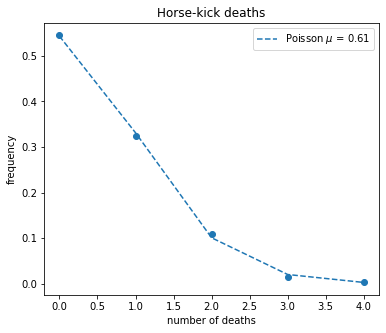

In [2]:
from scipy.stats import poisson

#total number of dead bodies: 122
total_death = 0
for i in range(len(N_death)):
    total_death += N_death[i]*N_group[i]

#total number of army group
total_groups = np.sum(N_group)

#mean value of deaths per group
mean = total_death/total_groups
print('The average number of deaths per group is: ', mean)

#Poisson distribution with mu = mean
dist = poisson(mean)
xaxis = np.arange(0,5)

#defining the frequency so that the function is normalized
frequency = N_group/total_groups

#plot
fig, ax = plt.subplots(1,1, figsize=(6,5))

ax.scatter(N_death, frequency)
ax.plot(xaxis, dist.pmf(xaxis), c='tab:blue', ls = '--', label = "Poisson $\mu$ = %.2f" %mean)
ax.legend()
ax.set_title("Horse-kick deaths")
ax.set_ylabel("frequency")
ax.set_xlabel("number of deaths")

In the cell above I use the average number of deaths per group as the mean of the Poisson distibution. This works actually because from ML analysis with a Poisson distribution you still get that the best estimator for $\mu$ is the sample mean (L05). But without knowing it, I could just try to plot Poisson distributions with different parameters to understand the interval in which the mean has to lie, as shown in the next cell.

Text(0.5, 0, 'number of deaths')

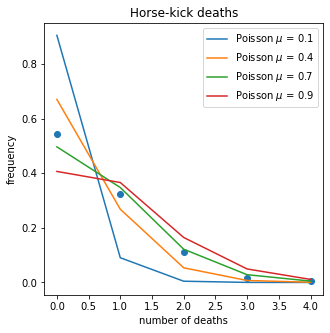

In [3]:
#other tries
fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.scatter(N_death, frequency)

#try to fit other poisson distribution
mu = [0.1, 0.4, 0.7, 0.9]
for i in range(len(mu)):
    dist_arr = poisson(mu[i])
    ax.plot(xaxis, dist_arr.pmf(xaxis), label = "Poisson $\mu$ = %.1f" %mu[i])
    
ax.legend()
ax.set_title("Horse-kick deaths")
ax.set_ylabel("frequency")
ax.set_xlabel("number of deaths")

From this last plot it is clear that even if we don't know the mean, the parameter $\mu$ has to lie between 0.4 - 0.7